# China Bots Writeup

## 1. Introduction



In [2]:
# imports we'll be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates

from writeup_func import *

In [3]:
%load_ext autoreload
%autoreload 2

### Hong Kong Political Climate

In 1997, The People's Republic of China had gained sovreignty of China from the British, under the agreement of "One County, Two Systems." This arrangment (formally called the Sino-British Joint Declaration) granted Hong Kong its status as a a special autonomous region until 2047, meaning that mainland China could not alter the previously existing legal and judicial systems - such as the right to assemble and freedom of speech - present from British rule. However, as we approach the halfway mark of the declaration's lifespan, tensions between Hong Kong and mainland China have increased. 

In April 2019, mainland China amended the ["Fugitive Offenders and Mutual Legal Assistance in Criminal Matters Legislation" bill](https://www.legco.gov.hk/yr18-19/english/bills/b201903291.pdf), allowing Hong Kong locals to face trials for crimes they were wanted for in other countires such as mainland China or Taiwan (both of which Hong Kong has no extradition laws with). This was met with immediate pushback by Hong Kong, as it directly violated their [constitution](https://www.basiclaw.gov.hk/en/basiclawtext/) called "the Basic Law," which states that no mainland official can get involved in local government affairs. Additionally, this risked exposing Hong kong locals to unfair trials, and possibly targetting anyone who spoke out against the mainland. Thus, hundreds of thousands of locals took to the streets to defend their liberties. And eventually, Hong Kong leader Carrie Lam said the bill would be suspended indefinitely, but not withdrawn.

This led people to continue protesting, adopting the motto ["Five demands, not one less!"](https://mobile.reuters.com/article/amp/idUSKCN1VK0H6?__twitter_impression=true), which demanded:
- Full withdrawal of the extradition bill
- An independent commission of inquirty into alleged police brutality
- Retracting the classification of protestors as "rioters"
- Amnesty for arrested protestors
- Dual universal suffrage

However, only the first demand has been met, and protestors still fight on, even during this pandemic

_UPDATE:
Though out of the scope of the data, mainland China has now passed a [bill](https://www.scmp.com/news/hong-kong/politics/article/3091595/hong-kong-national-security-law-read-full-text) devastating Hong Kong local's civil liberties (and not just people living in Hong Kong, people ANYWHERE could be tried based on the wording). One of the most worrying articles states that secession, subversion, terrorism, and collusion with foreign forces incur life sentences - though this could literally mean anything that the mainland doesn't like._

### China and Social Media
Twitter is banned in mainland China, and Weibo is the mainland China equivalent of Twitter.

### Dataset

In August 2019, as a direct response to an information operation directed at Hong Kong by the Chinese Communist Party, Twitter suspended 936 accounts from within the People's Republic of China. These accounts had violated Twitter's [platform manipulation policies](https://help.twitter.com/en/rules-and-policies/platform-manipulation), and were ["deliberately and specifically attempting to sow political discord in Hong Kong, including undermining the legitimacy and political positions of the protest movement on the ground."](https://blog.twitter.com/en_us/topics/company/2019/information_operations_directed_at_Hong_Kong.html). With these suspensions Twitter released the suspended accounts, including all previously publically available tweets and user information (tweet content, tweet times, user language, account creation, etc.).

More accounts have been suspended since then, and we now have a total of 5,241 accounts, and 13,847,731 separate tweets.

## 2. Surface Level Analysis

In [4]:
# load in dfs
users, tweets = create_dfs()

### Account Creation Dates

Figuring out the account creation dates can give some insight into the history of some of these bot accounts. Let's take a look at the creation dates by year and see if we can learn anything from that.

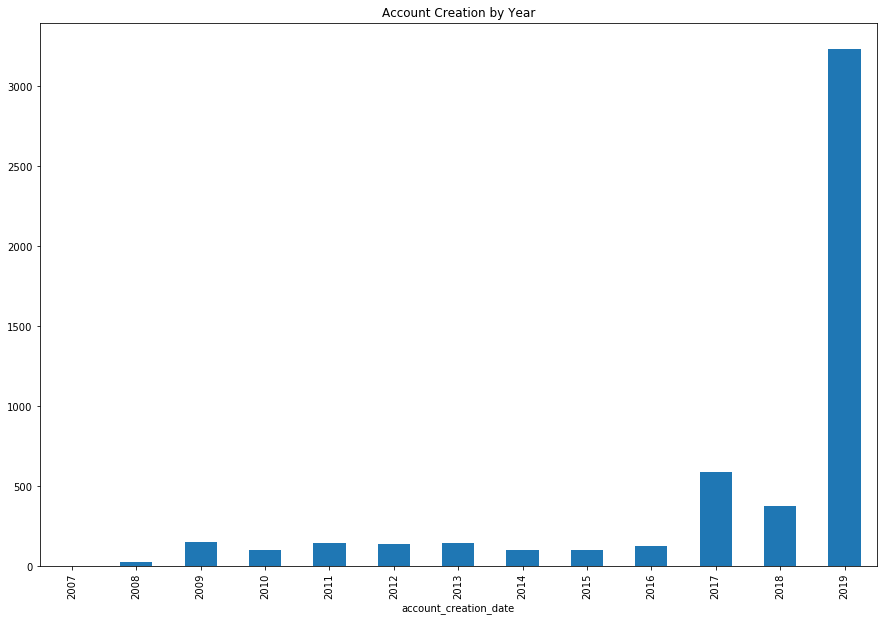

In [5]:
account_creation_2(users)

Unsurprisingly, most of the accounts are from 2019, with a small spike in 2017. The spikes in 2017 may stem from the Hong Kong Chief Executive Election, though further investigation must be done first.

Overall, we observe that 61.7% of the accounts were created in 2019. This may mean the other accounts were bought online to make the network they were creating seem less suspicious, 

### Tweet Language

Let's also see what language the majority of the tweets came in. This might help us what type of audience this operation is targetting

In [6]:
tweet_language(tweets)

tweet_language
in     4898835
en     2483706
zh      743190
und     736252
ar      697315
id      333096
pt      302572
tl      225020
es      208176
de      130312
Name: tweet_language, dtype: int64

Oddly enough, a majority of the tweets (43%) are in Indonesian? Let's take a look to see if there's a large amount of suspended accounts tweeting in Indonesian or if it's a few users

In [7]:
#TODO

Okay, so it seems there's about 666 users tweeting in indonesian, which is only about 12% of the suspended accounts. However, upon further investigation of these top posting accounts, it seems that they were sold - and in fact even tweeted about selling the accounts. Here's one user's tweet about that (userid:832941887539417088, made anonymous by Twitter). 

**Original Tweet** at 2019-06-07 04:23:00 UTC

Mendingan rest atau jual acc ini?	

**Translation**

Better rest or sell this acc?

The same person then went on to tweet again later that day the account was sold.

#TODO SECTION ABOUT CLIENT NAME CHANGING

### Tweet Times

In [ ]:
tweet_time(tweets)

### Twitterverse 

Occupies kpop stans, porn bots, recipes, and inspirational quotes

## 3. Deep Dive

### Who are these accounts targetting?

After taking a look at some of the tweets, we found that if they weren't junk or more attempts at building an audience through random retweets - tweets seemed targetted at Guo Wengui (郭文贵), Gui Minhai (桂敏海), or Yu Wensheng (余文生) (though there are probably more I couldn't find specifically). Here are some example tweets targetting these people:

"闹剧被拆穿无数的郭文贵，最近编造谎言确实不太走心，不仅创意是烂的可以，内容也是极为可笑，空剩下一副蹭热点的激情，但苦于军师不足，结果漏洞百出，五月的黑色依旧延续，估计郭文贵的六月同样也是黑色。"

**Translation:**

*The farce has been dismantled by countless Guo Wengui. Recently, it is true that the lie is not very deliberate. Not only is the creativity bad, but the content is also extremely ridiculous. There is only a pair of hot spots left. However, due to insufficient military personnel, the result is full of loopholes. The black continues, and it is estimated that Guo Wengui's June is also black.*

[Guo Wengui](https://en.wikipedia.org/wiki/Guo_Wengui) is a Chinese billionaire who has previously accused the Communist Chinese Party of corruption, and is currently exiled. He fled from China in 2014, due to being charged with accusations of bribery, fraud, money laundering and rape - all of which he denies. He has previously worked with Steve Bannon to investigate the CCP and has spent over 100 million USD on that campaign, and is now being investigated by the FBI.

'#桂民海  12年前的一场车祸，夺取去了老两口唯一爱女的生命。而车祸肇事者正是桂敏海。'

**Translation**

*A car accident 12 years ago took the life of the only daughter of the old couple. The perpetrator of the car accident was Gui Minhai.* (This didn't happen)

Gui Minhai was a Chinese bookstore owner who originally made headlines after disappearing from Taiwan in 2015, and then reappearing in mainland China. The bookstore he owned was Causeway Books, one of few spots where Hong Kong citizens went for uncensored political discussion. He was arrested for "providing intelligence" overseas, for being seen talking to Swedish ambassadors, even though he holds Sw

"#余文生\xa0\xa0#妨碍公务罪 请将警察当做一个有血有肉的人而不是不知疲倦的机器，当做有尊严有底线的同胞而不是可以肆意撒气的出气筒!"

**Translation**

*#YuWensheng \xa0\xa0# Crime of obstructing official duties Please treat the police as a flesh and blood person rather than a tireless machine, as a compatriot with dignity and a bottom line, not a punching bag that can arrogantly vent!*

[Yu Wensheng](https://www.frontlinedefenders.org/en/case/yu-wensheng-detained-and-charged-disrupting-public-service) is a Chinese human rights lawyer who was detained for "disrupting public service" while bringing his son to school, just hours after publically criticizing the CCP. He is still currently sentenced to four years of imprisonment, and three years deprivation of political service.

